In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

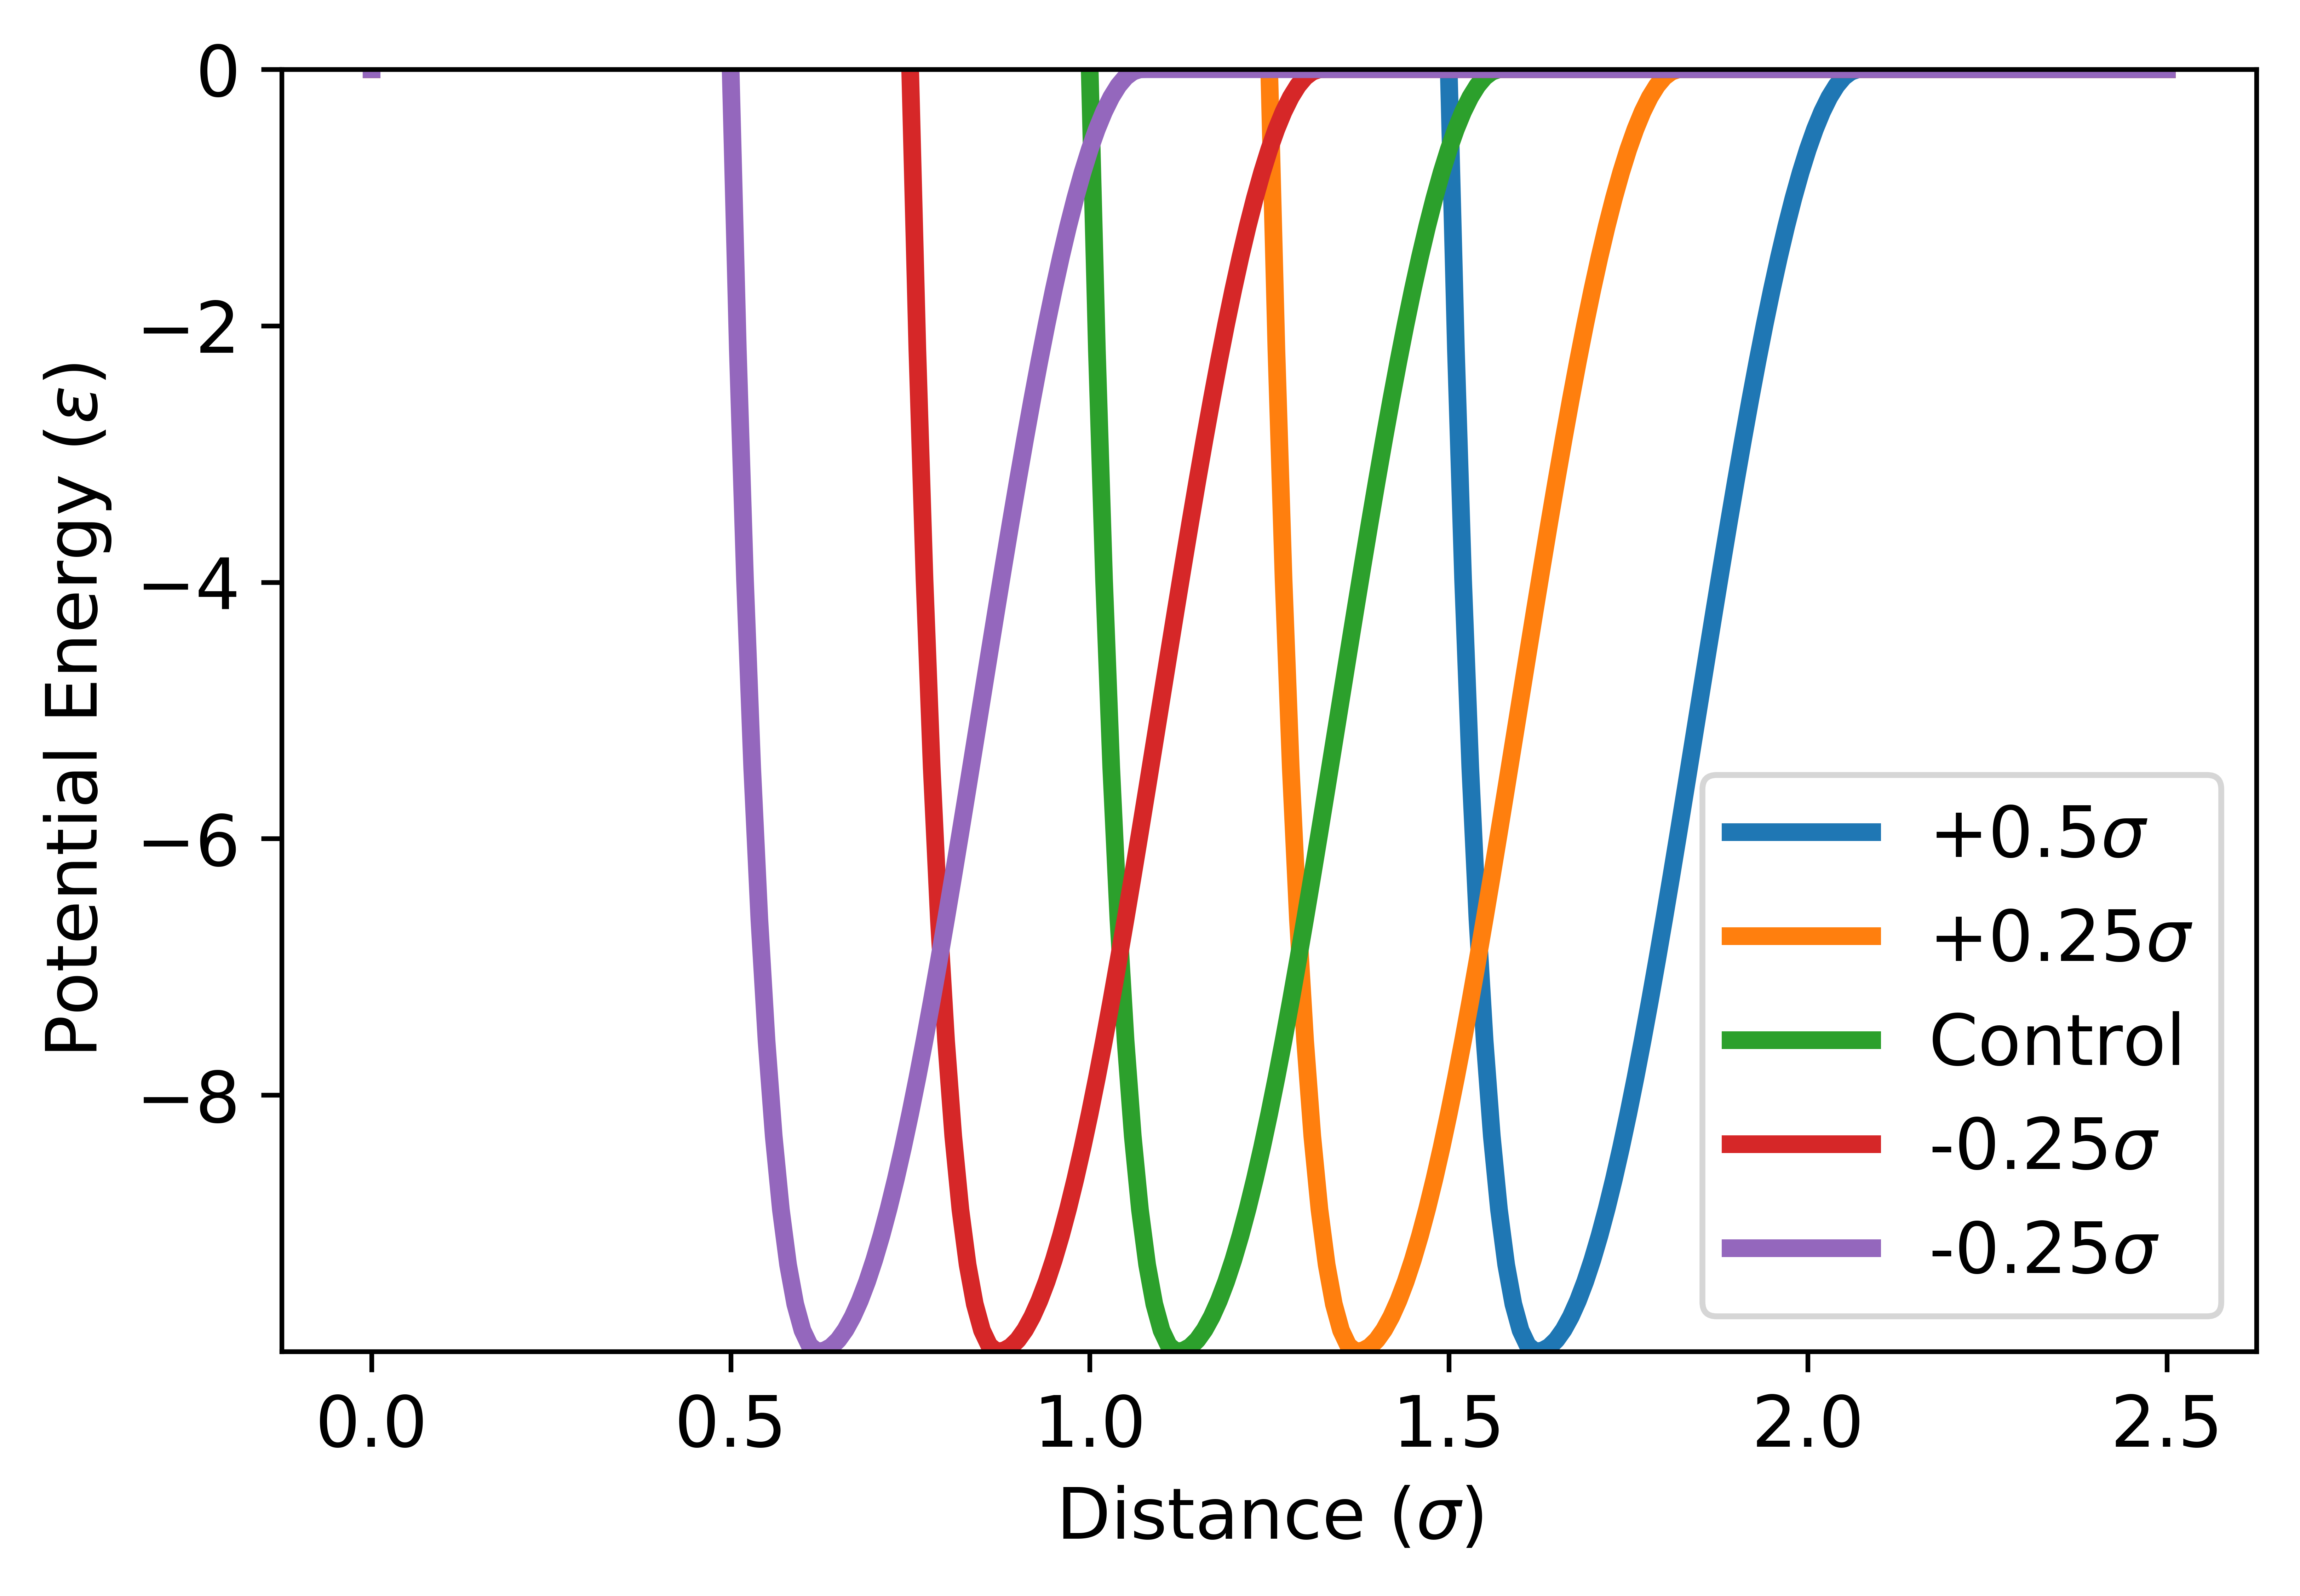

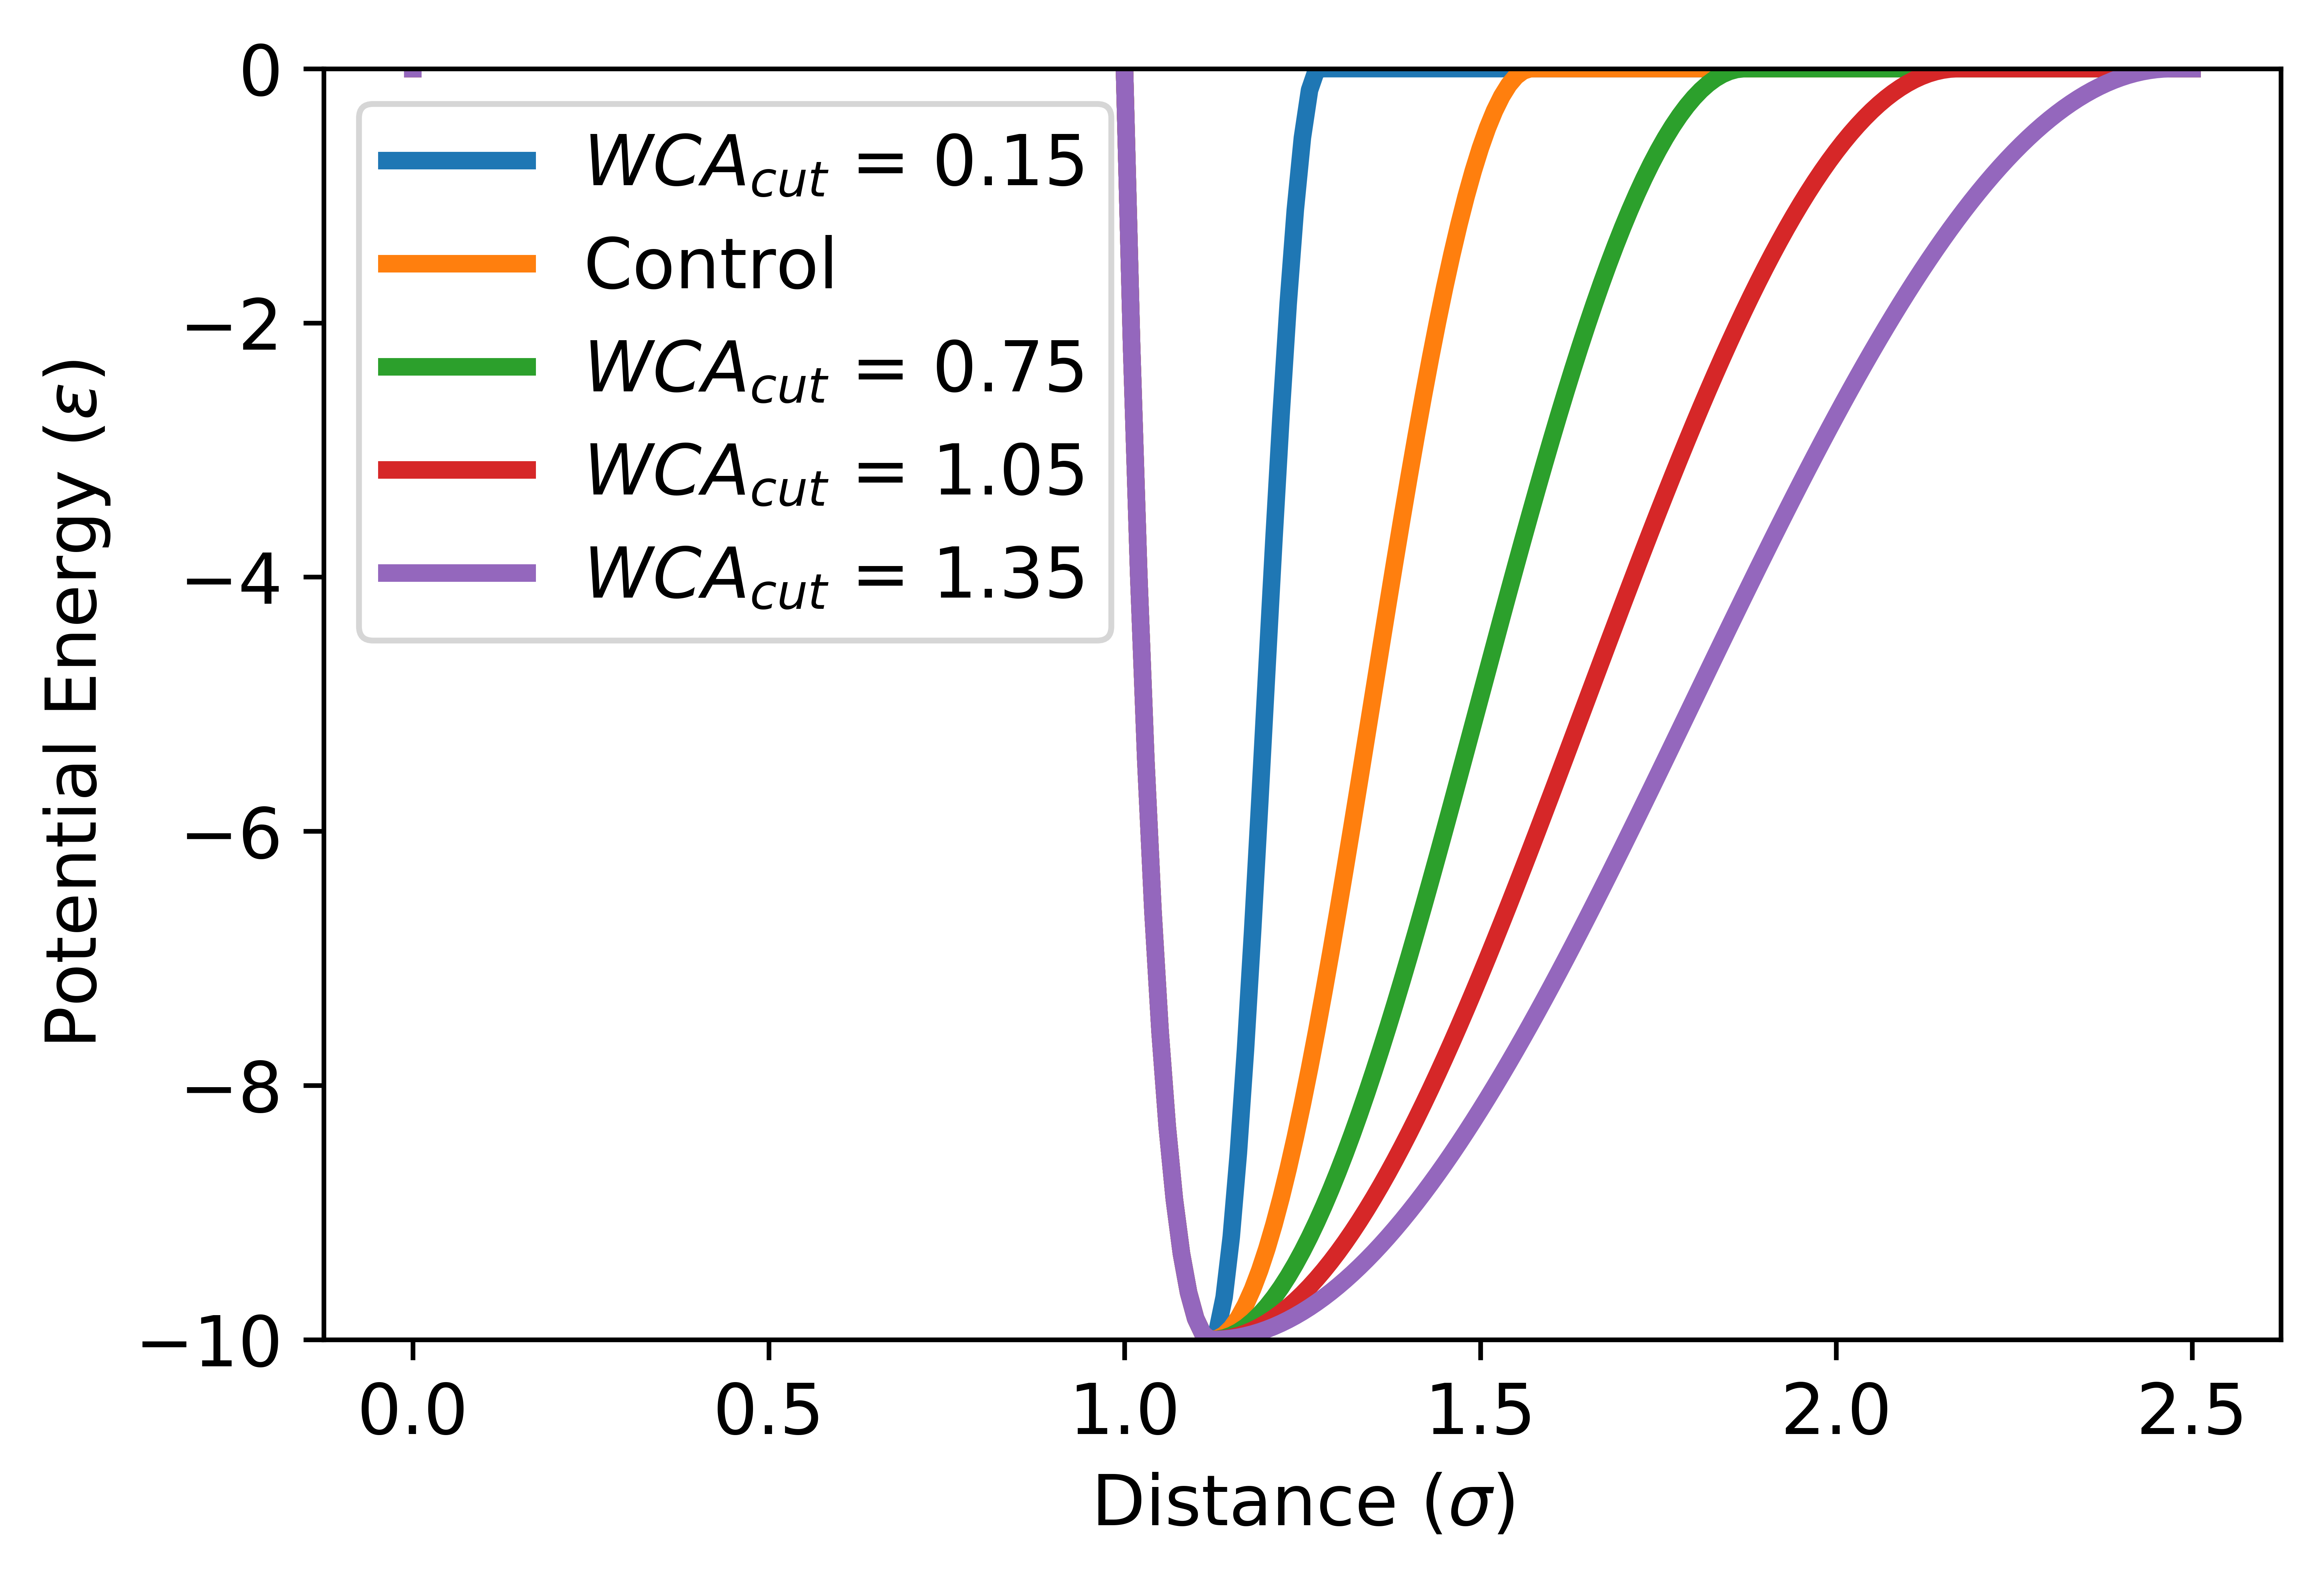

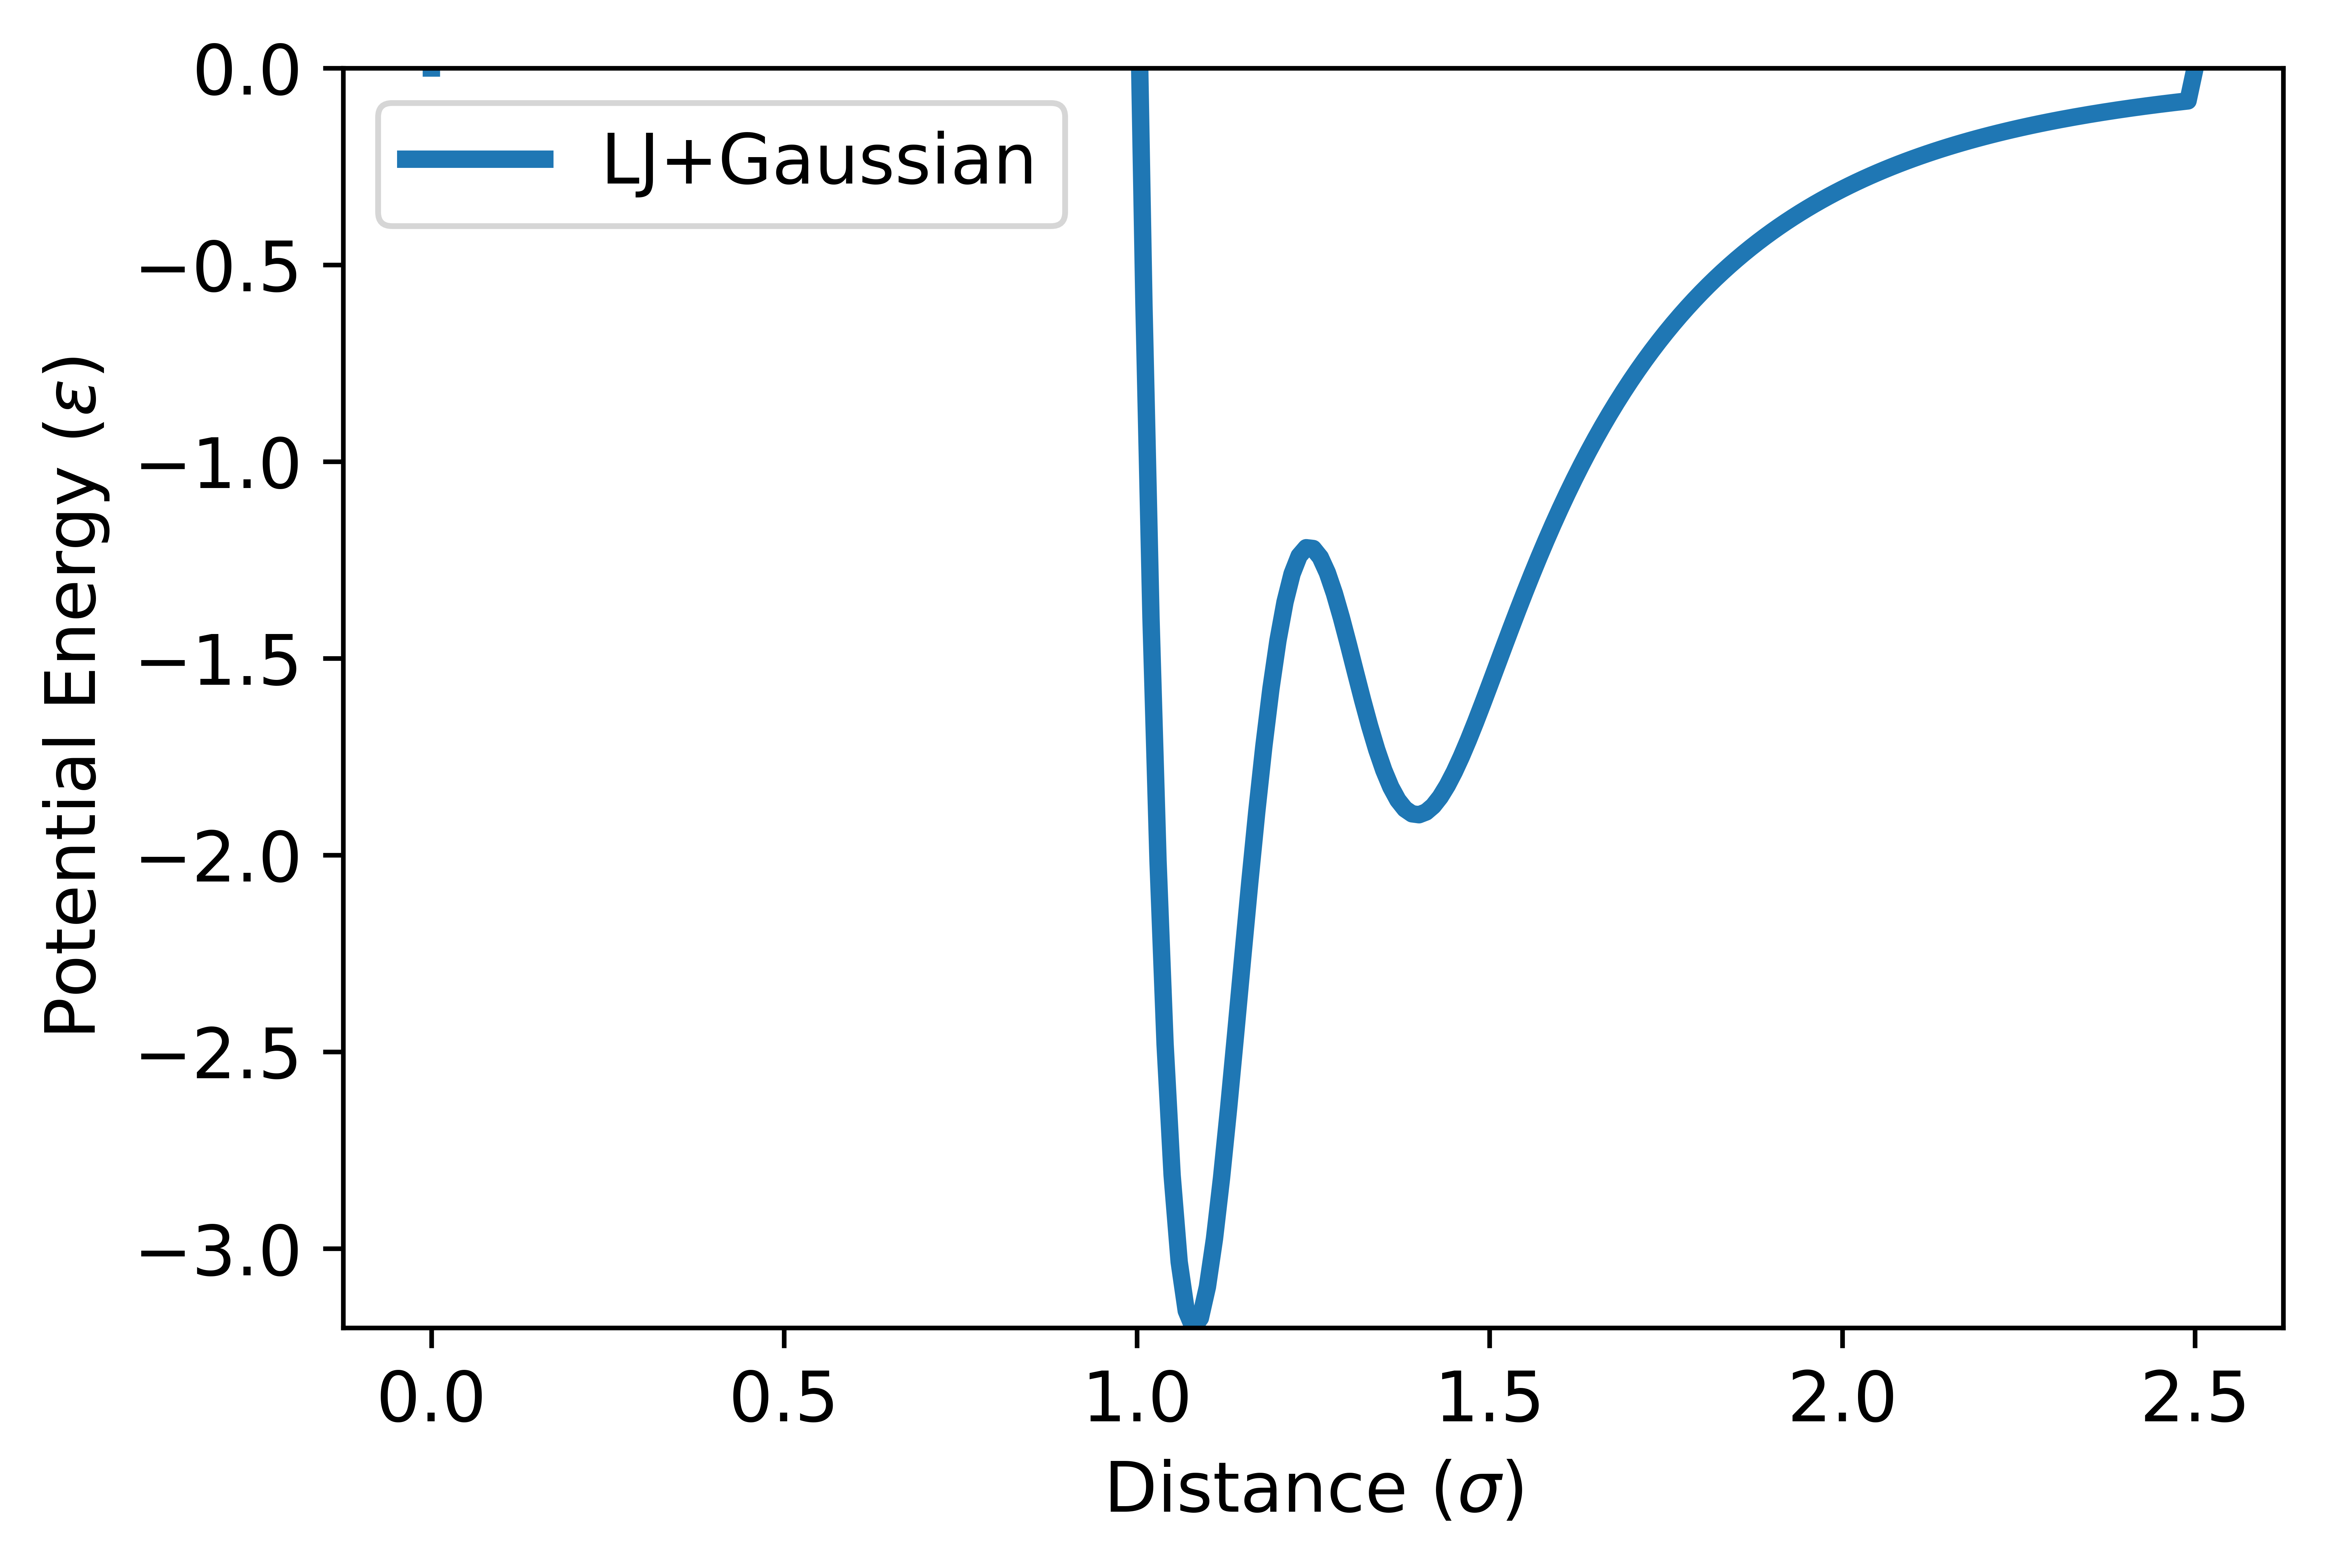

In [28]:
def parse_interaction_data_revised(lines, interaction_type):
    interaction_data = {}
    capturing = False
    for line in lines:
        if line.strip() == interaction_type:
            capturing = True
            interaction_data[interaction_type] = {'distance': [], 'energy': [], 'force': []}
            continue
        if capturing:
            if line.strip().startswith('N') or line.strip() == '':
                continue  # Skip lines with N and R values or empty lines
            elif not line.strip()[0].isdigit():
                break  # Stop capturing if we reach a non-data line
            else:
                parts = line.split()
                if len(parts) >= 3:  # Ensure we have at least 3 parts (index, distance, energy)
                    interaction_data[interaction_type]['distance'].append(float(parts[1]))
                    interaction_data[interaction_type]['energy'].append(float(parts[2]))
                    interaction_data[interaction_type]['force'].append(float(parts[3]))
    return interaction_data

folders = ['shift_','widen_','form_']
add = [['0','1','2','3','4'],['0','1','2','3','4'],['']]
labels = [['+0.5$\sigma$','+0.25$\sigma$','Control','-0.25$\sigma$','-0.25$\sigma$'],
         ['$WCA_{cut}$ = 0.15','Control','$WCA_{cut}$ = 0.75','$WCA_{cut}$ = 1.05','$WCA_{cut}$ = 1.35'],
         ['LJ+Gaussian']]
count = 0
for i in folders:
    plt.figure(dpi=1200)
    counter = 0
    for j in add[count]:

        interaction_types = ['HEAD_HEAD','PART_HEAD']
        data_file_path = i+j+'.dat'

        # Read and display the first few lines of the file to understand its structure
        with open(data_file_path, 'r') as file:
            lines = file.readlines()
        # Parsing the data again with the revised function
        parsed_data_revised = {}
        for interaction in interaction_types:
            parsed_data_revised.update(parse_interaction_data_revised(lines, interaction))

        data = parsed_data_revised['PART_HEAD']
        head = parsed_data_revised['HEAD_HEAD']
        plt.plot(data['distance'], np.asarray(data['energy']), linewidth = 3,label = labels[count][counter])
        counter +=1
    plt.legend()
    count+=1
    plt.ylim(np.min(data['energy']),0)
    plt.xlabel('Distance ($\sigma$)')
    plt.ylabel('Potential Energy ($\epsilon$)')